#Práctica 1. Pablo Rodríguez Fernández

#Preparativos

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/



Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math

**Funciones Auxiliares**

In [3]:
#Funcion para ajustar los valores negativos para facilitar la visualizacion
def pintl(im):
  #Sumar el minimo y multiplicamos por el maximo (ya que el rango numerico es entre [-1,1])
  im=(im+abs(np.min(im))) #Sumamos el valor minimo en valor absoluto
  im=im/np.max(im) #Dividimos todos los valores entre el maximo de la matriz obtenida en el paso anterior
  im = np.array(im*255, dtype = np.uint8) #Escalamos al intervalo [0,255] para que OpenCV muestre correctamente la escala de grises
  cv2_imshow(im)

#Funcion para mostrar juntas imagenes
def pintaMI(vim,grises = True, reescalado = False):
  max_height = 0 # find the max hight of all the images
  total_width = 0 # the total width of the images (horizontal stacking)

  max_height = max(img.shape[0] for img in vim)
  total_width = sum(img.shape[1] for img in vim)

  # create a new array with a size large enough to contain all the images
  if grises:
    final_image = np.zeros((max_height,total_width))
  else:
    final_image = np.zeros((max_height,total_width,3))

  current_x = 0 # keep track of where your current image was last placed in the x coordinate
  for img in vim:
    # add an image to the final array and increment the x coordinate
    final_image[:img.shape[0],current_x:img.shape[1]+current_x] = img
    current_x += img.shape[1]
  if reescalado:
    pintl(final_image)
  else:
    cv2_imshow(final_image)

#Funcion para mostrar imagenes con sus titulos
def visualizar(images,titles,figsize,rows,columns):
  
  fig = plt.figure(figsize=figsize)
  rows=2
  columns=2

  for i in range(len(images)):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.axis('off')
    plt.title(titles[i])


#Ejercicio 1A

**Considere la función Gaussiana 1D de media 0 y desviación típica σ. Calcular las máscaras discretas 1D de la función Gaussiana, la derivada de la Gaussiana y la segunda derivada de la Gaussiana. La función implementada debe considerar que tanto el valor de σ como el tamaño de la máscara son posibles entradas alternativas a la función. Represente en ejes cartesianos las máscaras obtenidas como funciones 1D y compare sus formas con las máscaras dadas por la función de OpenCV getDerivKernels para los mismos tamaños de máscara. Use los tamaños 5, 7 y 9.**

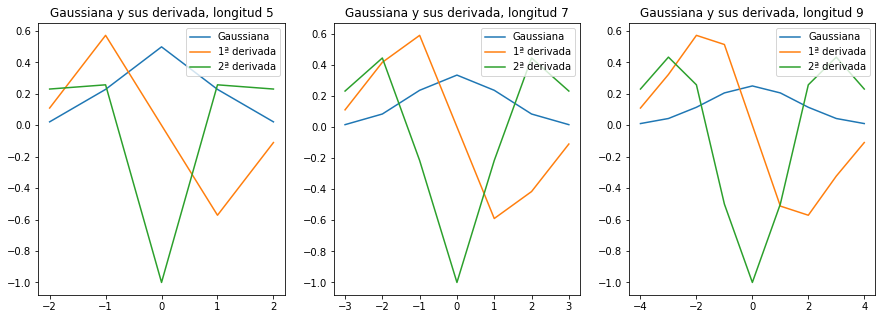

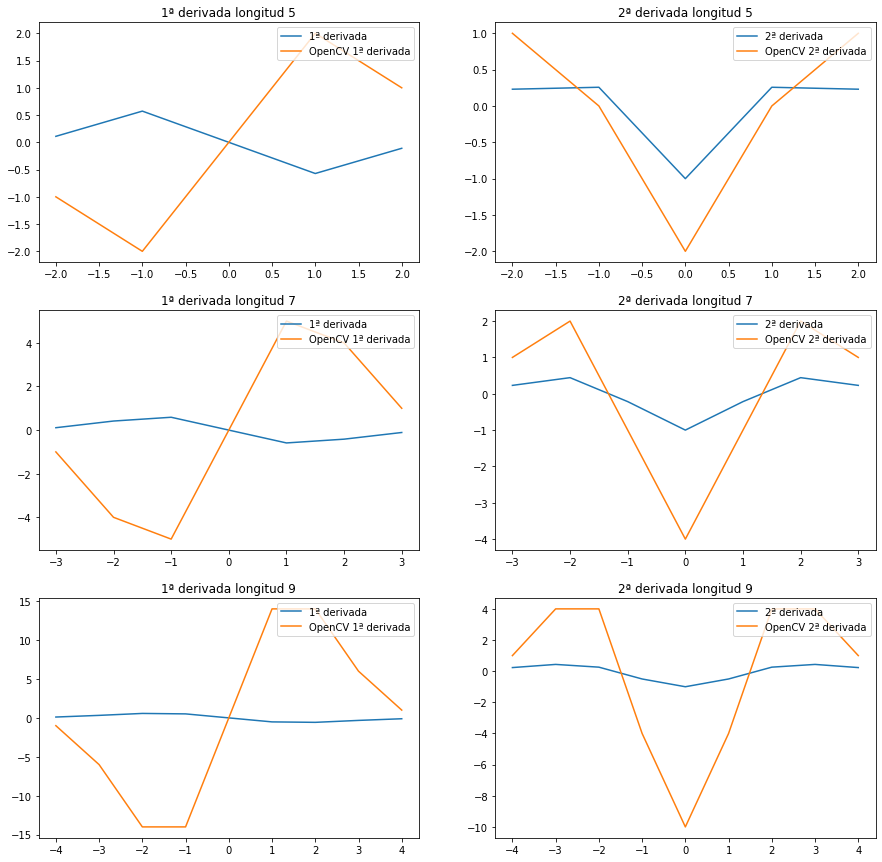

In [4]:
def mascaras1D(sigma=-1,longitud=-1):

  #Calculo de parametros
  if sigma!=-1: #Nos proporcionan el sigma
    longitud = 2*np.ceil(2.5*sigma)+1

  else: #Nos proporcionan el tamanho de la mascara 
    sigma = (longitud-1)/5 # 5==2*2.5

  #Creacion de la estructura de la mascara
  extension_mascara = longitud//2
  valores=np.arange(-extension_mascara,extension_mascara+1)
  
  #Funciones evaluadoras
  gaussiana = lambda valor,sigma : np.exp(-(valor**2)/(2*sigma**2))
  primeraDerivada = lambda valor,sigma : sigma*(-valor/sigma**2)*np.exp(-valor**2/(2*sigma**2))
  segundaDerivada = lambda valor,sigma : (sigma**2)*((-1/sigma**2)+(valor**2/sigma**4))*np.exp(-valor**2/(2*sigma**2))
  
  #Calculo Mascara Gaussiana
  msn_gaussiana  = np.array([gaussiana(i,sigma) for i in valores]) #Mascara sin normalizar
  mascara_gaussiana = msn_gaussiana / np.sum(msn_gaussiana)

  #Calculo Mascara Primera derivada
  mascara_1derivada  = np.array([primeraDerivada(i,sigma) for i in valores]) 

  #Calculo Mascara Segunda derivada
  mascara_2derivada  = np.array([segundaDerivada(i,sigma) for i in valores]) 

  return mascara_gaussiana,mascara_1derivada,mascara_2derivada


#Calculo de las mascaras utilizando la funcion
gaussiana_5,derivada1_5,derivada2_5=mascaras1D(longitud=5)
gaussiana_7,derivada1_7,derivada2_7=mascaras1D(longitud=7)
gaussiana_9,derivada1_9,derivada2_9=mascaras1D(longitud=9)

#Calculo de mascaras 1D utilizando getDerivKernels()
sobel5_1der = cv.getDerivKernels(1,0,5)[0]
sobel7_1der = cv.getDerivKernels(1,0,7)[0]
sobel9_1der = cv.getDerivKernels(1,0,9)[0]

sobel5_2der = cv.getDerivKernels(2,0,5)[0]
sobel7_2der = cv.getDerivKernels(2,0,7)[0]
sobel9_2der = cv.getDerivKernels(2,0,9)[0]

########## VISUALIZACION DE RESULTADOS ###################
#Impresion de las mascaras
#print("-------Mascaras de longitud 5--------")
#print("Gaussiana:   ",gaussiana_5)
#print("1ª derivada: ",derivada1_5)
#print("2ª derivada: ",derivada2_5)
#print("\n-------Mascaras de longitud 7--------")
#print("Gaussiana:   ",gaussiana_7)
#print("1ª derivada: ",derivada1_7)
#print("2ª derivada: ",derivada2_7)
#print("\n-------Mascaras de longitud 9--------")
#print("Gaussiana:   ",gaussiana_9)
#print("1ª derivada: ",derivada1_9)
#print("2ª derivada: ",derivada2_9,"\n\n")

#Representaciones graficas------------------------------------------------

#GAUSSIANA------------------------------
fig_gaussiana = plt.figure(figsize=(15,5))
rows=1
columns=3

#Dimension 5
marcas_x = np.arange(-len(gaussiana_5)//2 +1,len(gaussiana_5)//2 +1)
ax5_g = fig_gaussiana.add_subplot(rows,columns,1)
mascaras = {'gaussiana': gaussiana_5,'1derivada':derivada1_5,'2derivada':derivada2_5}
ax5_g.plot(marcas_x,mascaras['gaussiana'],label='Gaussiana')
ax5_g.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax5_g.plot(marcas_x,mascaras['2derivada'],label='2ª derivada')
ax5_g.set_title('Gaussiana y sus derivada, longitud 5')
ax5_g.legend(loc='upper right')

#Dimension 7
marcas_x = np.arange(-len(gaussiana_7)//2 +1,len(gaussiana_7)//2 +1)
ax7_g = fig_gaussiana.add_subplot(rows,columns,2)
mascaras = {'gaussiana': gaussiana_7,'1derivada':derivada1_7,'2derivada':derivada2_7}
ax7_g.plot(marcas_x,mascaras['gaussiana'],label='Gaussiana')
ax7_g.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax7_g.plot(marcas_x,mascaras['2derivada'],label='2ª derivada')
ax7_g.set_title('Gaussiana y sus derivada, longitud 7')
ax7_g.legend(loc='upper right')

#Dimension 9
marcas_x = np.arange(-len(gaussiana_9)//2 +1,len(gaussiana_9)//2 +1)
ax9_g = fig_gaussiana.add_subplot(rows,columns,3)
mascaras = {'gaussiana': gaussiana_9,'1derivada':derivada1_9,'2derivada':derivada2_9}
ax9_g.plot(marcas_x,mascaras['gaussiana'],label='Gaussiana')
ax9_g.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax9_g.plot(marcas_x,mascaras['2derivada'],label='2ª derivada')
ax9_g.set_title('Gaussiana y sus derivada, longitud 9')
ax9_g.legend(loc='upper right')

plt.show()

#DERIVADAS------------------------------------- 

fig = plt.figure(figsize=(15,15))
rows=3
columns=2

#Dimension 5---------------------------------------------------------
marcas_x = np.arange(-len(gaussiana_5)//2 +1,len(gaussiana_5)//2 +1)

#Primera derivada
ax5_1 = fig.add_subplot(rows,columns,1)
mascaras = {'1derivada': derivada1_5,'mascara5':sobel5_1der}
ax5_1.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax5_1.plot(marcas_x,mascaras['mascara5'],label='OpenCV 1ª derivada')
ax5_1.set_title('1ª derivada longitud 5')
ax5_1.legend(loc='upper right')

#Segunda derivada
ax5_2 = fig.add_subplot(rows,columns,2)
mascaras = {'1derivada': derivada2_5,'mascara5':sobel5_2der}
ax5_2.plot(marcas_x,mascaras['1derivada'],label='2ª derivada')
ax5_2.plot(marcas_x,mascaras['mascara5'],label='OpenCV 2ª derivada')
ax5_2.set_title('2ª derivada longitud 5')
ax5_2.legend(loc='upper right')

#Dimension 7---------------------------------------------------------
marcas_x = np.arange(-len(gaussiana_7)//2 +1,len(gaussiana_7)//2 +1)

#Primera derivada
ax7_1 = fig.add_subplot(rows,columns,3)
mascaras = {'1derivada': derivada1_7,'mascara5':sobel7_1der}
ax7_1.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax7_1.plot(marcas_x,mascaras['mascara5'],label='OpenCV 1ª derivada')
ax7_1.set_title('1ª derivada longitud 7')
ax7_1.legend(loc='upper right')

#Segunda derivada
ax7_2 = fig.add_subplot(rows,columns,4)
mascaras = {'1derivada': derivada2_7,'mascara5':sobel7_2der}
ax7_2.plot(marcas_x,mascaras['1derivada'],label='2ª derivada')
ax7_2.plot(marcas_x,mascaras['mascara5'],label='OpenCV 2ª derivada')
ax7_2.set_title('2ª derivada longitud 7')
ax7_2.legend(loc='upper right')

#Dimension 9---------------------------------------------------------
marcas_x = np.arange(-len(gaussiana_9)//2 +1,len(gaussiana_9)//2 +1)

#Primera derivada
ax9_1 = fig.add_subplot(rows,columns,5)
mascaras = {'1derivada': derivada1_9,'mascara5':sobel9_1der}
ax9_1.plot(marcas_x,mascaras['1derivada'],label='1ª derivada')
ax9_1.plot(marcas_x,mascaras['mascara5'],label='OpenCV 1ª derivada')
ax9_1.set_title('1ª derivada longitud 9')
ax9_1.legend(loc='upper right')

#Segunda derivada
ax9_2 = fig.add_subplot(rows,columns,6)
mascaras = {'1derivada': derivada2_9,'mascara5':sobel9_2der}
ax9_2.plot(marcas_x,mascaras['1derivada'],label='2ª derivada')
ax9_2.plot(marcas_x,mascaras['mascara5'],label='OpenCV 2ª derivada')
ax9_2.set_title('2ª derivada longitud 9')
ax9_2.legend(loc='upper right')

plt.show()


En este  ejercicio se pide, inicialmente, realizar una función para obtener las máscaras 1D de la Gaussiana y su primera y segunda derivada, a partir de un sigma o una longitud de máscara pasada como parámetro.


Para calcular sigma o la longitud se utiliza la siguiente fórmula, que relaciona ambos parámetros y permite obtener uno en función del otro:       $$longitud = 2*ceil(2.5*\sigma)+1$$

La razón de multiplicar $2.5*\sigma$ es por una propiedad de la función Gaussiana: el área bajo una gaussiana en el intervalo $[-2.5*\sigma,2.5*\sigma]$ incluye aproximadamente el 97.5% de todos los valores que toma.

Tras esto, construímos el vector que contendrá la máscara, el cual se rellena con los valores $[-k,-k+1,...,0,...,k,k+1]$, con $k=longitud$. Teniendo esto, calcular la máscara simplemente es aplicar las funciones lambda *gaussiana, primeraDerivada y segundaDerivada* a cada uno de los elementos del vector anterior. 

Es decir, 
$$máscara =[f(-k),f(-k+1),...,0,...f(k-1),f(k)]$$

En el caso de la máscara gaussiana, debemos normalizarla para que sume 1 en total (ya que el área total bajo la curva debe ser 1 por ser una distribución normal), de ahí que se divida cada elemento entre la suma de todos los elementos.

Posteriormente, se nos pide comparar gráficamente las máscaras obtenidas por la función anterior con las calculadas por OpenCV mediante la función *getDerivKernels(dx,dy,size)*. Esta función recibe como argumentos:

*   dx: Derivada n-ésima respecto de x
*   dy: Derivada n-ésima respecto de y
*   size: Tamaño de la máscara

La función devuelve 2 vectores, cada uno asociado a la derivada de X o Y calculada. Como en este caso solo nos interesan las máscaras 1D, y asumiendo que las calculamos en la componente X, se debe utilizar
$$mascaraPrimeraDerivada = getDerivKernels(1,0,k)[0]$$ y $$mascaraSegundaDerivada = getDerivKernels(2,0,k)[0]$$ con $k\in\{5,7,9\}$

Pasando a analizar las gráficas, en las 3 primeras se puede ver la máscara de la gaussiana junto con su 1ª y 2ª derivada para los tamaños pedidos. En este caso se puede ver como la 1ª derivada alcanza un máximo mayor que la propia función gaussiana. Esto es debido a la aproximación que se hace de $\sigma$ a partir de la longitud que recibe la función como parámetro.

En las otras imágenes se puede ver una comparativa de las máscaras de derivadas obtenidas manualmente y las calculadas por OpenCV para los tamaños pedidos. A simple vista se observa una gran diferencia (las máscaras obtenidas por OpenCV toman valores en valor absoluto más grandes), la cual es debido a que las máscaras devueltas por *getDerivKernels()* no son exactamente derivadas de la Gaussiana. Si se lee la documentación de dicha función, se podrá ver que lo que devuelve en realidad son máscaras de tipo *Sobel*. 







#Ejercicio 1B
**Calcule las máscaras discretas 1D de longitud 5 y 7 tanto de alisamiento como de derivada de primer orden generadas a partir de la aproximación binomial de la Gaussiana y la máscara de derivada de longitud 3. Ejecute la función cv2.getDerivKernels(0,1,9). Observe los vectores de salida y compárelos con los previamente calculados, ¿Qué relación hay? ¿Qué conclusiones extrae sobre la aproximación de OpenCV al cálculo de las máscaras de derivadas de primer orden?**

In [5]:

import scipy.special as scp

#Mascara derivada
derivada = np.array([1,0,-1]) #La ponemos ya invertida porque para convolucionar debemos invertirla!

#Mascaras de alisamiento
mask3=np.array([scp.binom(2,i) for i in range(3)]) 
mask5=np.array([scp.binom(4,i) for i in range(5)]) 
mask7=np.array([scp.binom(6,i) for i in range(7)])

#Mascaras de derivada
mask3_padding=np.append(mask3,[0,0])
mask3_padding=np.insert(mask3_padding,0,[0,0])
derivate5=np.array([mask3_padding[i]*derivada[0]+mask3_padding[i+1]*derivada[1]+mask3_padding[i+2]*derivada[2] for i in range(5)])

mask5_padding=np.append(mask5,[0,0])
mask5_padding=np.insert(mask5_padding,0,[0,0])
derivate7=np.array([mask5_padding[i]*derivada[0]+mask5_padding[i+1]*derivada[1]+mask5_padding[i+2]*derivada[2] for i in range(7)])

mask7_padding=np.append(mask7,[0,0])
mask7_padding=np.insert(mask7_padding,0,[0,0])
derivate9=np.array([mask7_padding[i]*derivada[0]+mask7_padding[i+1]*derivada[1]+mask7_padding[i+2]*derivada[2] for i in range(9)])

print("Mascaras de alisamiento: \n")
print("Longitud 5: ",mask5,"\n")
print("Longitud 7: ",mask7,"\n\n")
print("Mascaras de derivada:")
print("Longitud 5\nMascara calculada: ",derivate5,"\n")
print("Longitud 7\nMascara calculada: ",derivate7,"\n")
print("Longitud 9\nMascara calculada: ",derivate9," Mascara getDerivKernels(0,1,9): ",np.transpose(cv.getDerivKernels(0,1,9)[1]),"\n")


Mascaras de alisamiento: 

Longitud 5:  [1. 4. 6. 4. 1.] 

Longitud 7:  [ 1.  6. 15. 20. 15.  6.  1.] 


Mascaras de derivada:
Longitud 5
Mascara calculada:  [-1. -2.  0.  2.  1.] 

Longitud 7
Mascara calculada:  [-1. -4. -5.  0.  5.  4.  1.] 

Longitud 9
Mascara calculada:  [ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]  Mascara getDerivKernels(0,1,9):  [[ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]] 



En este apartado se pide calcular las máscaras de alisamiento  utilizando la aproximación binomial de la Gaussiana. Estas pueden ser obtenidas de 2 maneras diferentes:


*   Calculando las filas impares del triángulo binomial. Por ejemplo, para obtener la máscara de alisamiento gaussiano de longitud 5, bastaría con obtener los coeficientes de la 5ª fila del triángulo. Esta es la aproximación utilizada en el código, empleando la función *binom()* de la librería *scipy* (teniendo en cuenta que empieza a numerar las filas por 0, de ahí que para obtener la máscara de longitud 5, se utilice *binom(4,i)*)

*   Convolucionando de manera sucesiva la máscara $[1,1]$ consigo misma. Así, $[1,1]*[1,1]=[1,2,1]$, que se corresponde con la aproximación binomial de la máscara gaussiana de longitud 3. Si ahora convolucionamos $[1,2,1]$ con $[1,1]$, obtendremos la máscara de longitud 4 (la cual no nos interesa, pues se utilizan siempre máscaras impares). Realizando este proceso sucesivamente, podemos obtener la máscara de longitud $k$ a partir de convolucionar $[1,1]$ $k-2$ veces consigo misma.

Una vez tenemos la máscara de alisamiento de longitud $k-2$, obtener la máscara de 1ª derivada de longitud k simplemente es convolucionar dicha máscara con la  máscara de derivada  $[1,0,-1]$. Esto es debido a una propiedad de la Gaussiana: $$\frac{\partial }{\partial x}(L*G)=L*(\frac{\partial}{\partial x}G)$$
La ecuación anterior significa que calcular la derivada de una función $L$ convolucionada con la gaussiana $G$ es equivalente a calcular la derivada en la gaussiana y luego convolucionarla con $L$.

En la ejecución se muestran las máscaras de alisamiento y de derivadas de longitudes 5 y 7. Además, se calcula la máscara de derivada de longitud 9, ya que se pide compararla con la obtenida mediante la función *getDerivKernels(0,1,9)*. Se puede ver como ambas máscaras son iguales, lo cual podemos interpretar como que OpenCV calcula las máscaras de derivada de primer orden aproximando la gaussiana por la binomial.


#Ejercicio 1C
**Implementar la convolución de una imagen con una máscara 2D de dimensiones inferior a la imagen suponiendo la propiedad de separabilidad de la máscara e imponiendo bordes reflejados. La entrada a la función serán las máscaras 1D descomposición de la máscara 2D. Comparar su funcionamiento con**

**a. La salida de cv2.GaussianBlur para una máscara de entrada Gaussiana con iguales parámetros en ambos casos. Mostrar ambos resultados.**

**b. Usar las máscaras del punto A para calcular la imágenes derivadas respecto de x e y de una imagen dada. Mostrar los resultados.**




Imagen original


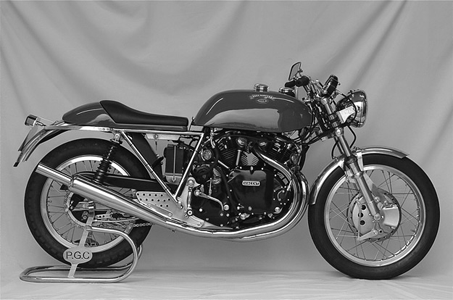


Diferencia entre las convoluciones:  8.394582424585076e-12


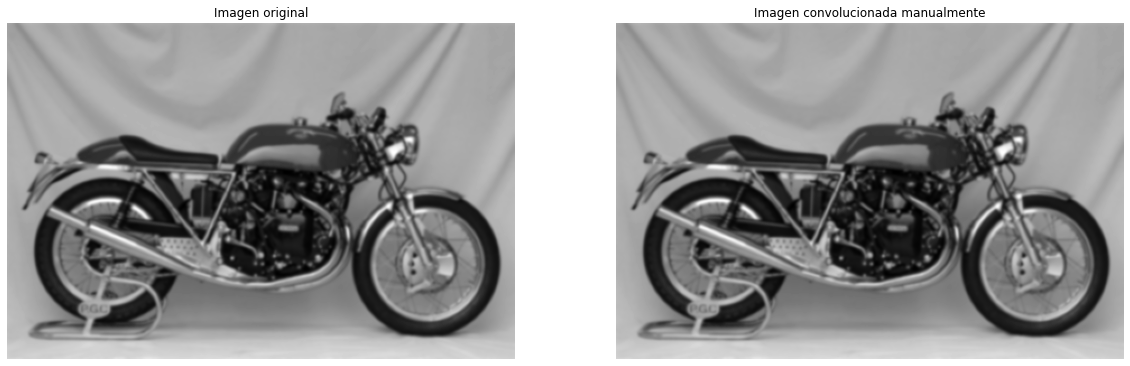

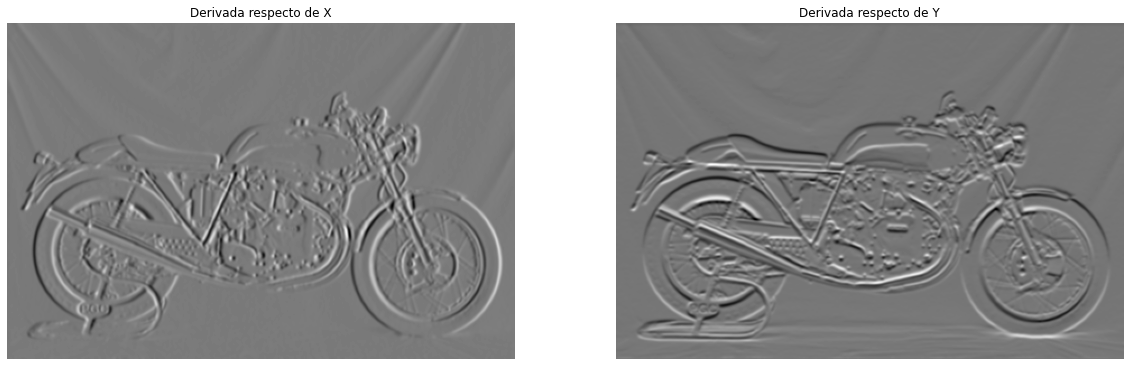

In [6]:
def recortarPadding(img,padding_filas,padding_columnas):
  rows = img.shape[0]
  columns = img.shape[1]
  return img[padding_filas:(rows-padding_filas),padding_columnas:(columns-padding_columnas)]

def convolucion(img,mask_rows,mask_columns): #El tamaño de la imagen de salida debe ser el mismo que el tamaño de la imagen de entrada

  #Obtencion de datos
  len_mrows = len(mask_rows)
  len_mcolumns = len(mask_columns)
  mask_rows = np.flip(mask_rows)
  mask_columns = np.flip(mask_columns)

  #Tamanho del padding anhadido para convolucionar
  padding_filas = len_mrows//2
  padding_columnas = len_mcolumns//2

  #Anhadimos los bordes. En este casom bordes reflejados
  img = cv.copyMakeBorder(img,padding_filas,padding_filas,padding_columnas,padding_columnas,borderType = cv.BORDER_REFLECT)

  #Creamos las imagenes auxiliares utilizadas en la convolucion 
  img_convolucionada_filas = np.zeros(shape=img.shape)
  img_convolucionada = np.zeros(shape=img.shape)

  #Obtenemos numero de filas y de columnas de la imagen con bordes
  rows = img_convolucionada.shape[0]
  columns = img_convolucionada.shape[1]

  #Convolucion por filas (mask_rows)
  mega_mask_rows = np.tile(mask_rows,rows).reshape((rows,len_mrows))
  for j in range(columns-len_mrows+1):
    img_part = img[:,j:j+len_mrows]
    img_convolucionada_filas[:,j+padding_filas] = np.sum(mega_mask_rows*img_part,axis=1)

  #Transponemos la imagen para aplicar la convolucion por columnas de la misma manera que se aplica por filas
  img_convolucionada_filas_t = img_convolucionada_filas.transpose()

  #Convolucion por columnas (mask_columns)
  mega_mask_columns = np.tile(mask_columns,columns).reshape((columns,len_mcolumns))
  for i in range(rows-len_mcolumns+1): 
    img_part = img_convolucionada_filas_t[:,i:i+len_mcolumns]
    img_convolucionada[i+padding_columnas,:] = np.sum(mega_mask_columns*img_part,axis=1)

  #Eliminamos el padding para obtener una imagen del mismo tamanho que la de entrada
  img_convolucionada = recortarPadding(img_convolucionada,padding_filas,padding_columnas)

  return img_convolucionada


#####################INVOCACION#################################
img = cv.imread('images/motorcycle.bmp',0).astype(np.float64)

gaussiana,derivada1,derivada2 = mascaras1D(longitud = 7)
img_convolucionada = convolucion(img,gaussiana,gaussiana) # Debido a la separabilidad de la gaussiana, para convolucionar una imagen 2D podemos utilizar la misma mascara 1D 2 veces
img_derivada_x = convolucion(img,derivada1,gaussiana)
img_derivada_y = convolucion(img,gaussiana,derivada1)
img_opencv = cv.GaussianBlur(img,(7,7),1.2,borderType = cv.BORDER_REFLECT) #1.2 = (7-1)/(2*2.5), donde 7 es la longitud de la máscara que se quiere obtener

###################VISUALIZACION DE RESULTADOS##################

print("Imagen original")
cv2_imshow(img)
imgs=[img_convolucionada,img_opencv]
titles=['Imagen original','Imagen convolucionada manualmente','Imagen convolucionada con GaussianBlur']
visualizar(imgs,titles,(20,15),1,2)
imgs=[img_derivada_x,img_derivada_y]
titles=['Derivada respecto de X','Derivada respecto de Y']
visualizar(imgs,titles,(20,15),1,2)
print("\nDiferencia entre las convoluciones: ",np.linalg.norm(img_convolucionada-img_opencv))



En este ejercicio debemos inicialmente implementar una función para realizar la convolución de una imagen con una máscara 2D, suponiendo que dicha máscara es separable.

Que una máscara 2D sea separable significa que es posible separarla en dos máscaras 1D, de tal manera que la convolución por la máscara 2D es equivalente a convolucionar una de las máscaras 1D por filas y la otra por columnas.

No todas las máscaras tienen dicha propiedad, pero en particular sí la tiene la máscara que se pide convolucionar: la gaussiana. 
Este hecho es consecuencia directa de la separabilidad de la función Gaussiana:
$$G(x,y)=\frac{1}{2\pi\sigma^2}e^{\frac{-x^2+y^2}{2\sigma^2}}=(\frac{1}{2\pi\sigma^2}e^{\frac{-x^2}{2\sigma^2}}).(\frac{1}{2\pi\sigma^2}e^{\frac{-y^2}{2\sigma^2}})$$

Pasando a la implementación, en primer lugar se guardan algunas variables que serán útiles a lo largo de la función (comola longitud de las máscaras). Cabe destacar que las máscaras deben ser invertidas (de ahí el empleo de la función *flip()* de *numpy*. Aunque en el caso concreto de las máscaras gaussianas esto no tenga importancia (ya que tanto ella como la máscara de sus derivadas son simétricas), en la convolución con una máscara arbitraria es importante debido a la resta que aparece en la definición de la convolución como función: 

*Sean* $f$ *y* $g$ *dos funciones de variable real, se define su convolución* $f*g$ *como* 
$$(f*g)(x)=\int_{-\infty}^{\infty} f(x-u)h(u) \,du$$

Tras esto, se obtiene el número de píxeles que va a ser necesario añadir a las filas y las columnas de la imagen para poder convolucionarla correctamente, y se añaden dichos bordes mediante la función de OpenCV *copyMakeBorder()*. En este caso se eligieron **bordes reflejados**, ya que en ejercicios posteriores se pide en que sean así.

Una vez se añaden los bordes, se crean 2 matrices auxiliares que se utilizarán para almacenar los cálculos de la convolución por filas y por columnas. Estas son necesarias pues, si incluyésemos los cálculos de la convolución directamente en la imagen, al convolucionar una región de la imagen, los píxeles cercanos ya convolucionados influirían en la convolución, provocando que el proceso fuese incorrecto.

Una vez realizadas todas las tareas anteriores, se llega a los bucles de convolución (uno para la convolución por filas y otro ara la convolución por filas). El funcionamiento es idéntico, ya que se transpone la matriz tras la primera convolución para poder reaprovechar el código (cambiando solamente todo lo referente a filas por columnas donde fuese necesario). Por tanto, solo se explicará el primero de estos bucles.

Lo primero a mencionar es que la convolución se realiza simultáneamente sobre todas las filas. Esto es posible porque los cálculos de una fila no afectan a los del resto, con lo cual, gracias a las funciones para cálculo vectorial proporcionadas por *numpy*, es posible realizar todos estos cálculos simultáneamente.

Para ello, cremos una matriz que contenga de tantas filas como filas tenga la imagen, conteniendo en cada fila una copia de la máscara a convolucionar (las variables *mega_mask*). Luego, se extrae un fragmento de la imagen del mismo tamaño, se multiplica por la máscara y se suma por filas. De esta manera, se calculan los valores de todas las filas de la columna $i$. En la siguiente iteración del bucle, se tomará un fragmento de la imagen un píxel a la derecha y se obtendran los valores de la columnas $i+1$, y así sucesivamente.

Finalmente, tras realizar las 2 convoluciones, se emplea la función previamente definida *recortarPadding()* para  que la imagen convolucionada tenga el mismo tamaño que la original.

En el ejercicio se pide convolucionar una imagen con la máscara gaussiana, y comparar el resultado con el empleo de la función *gaussianBlur()*. Para que la comparación sea adecuada, ambas funciones deben utilizar los mismos parámetros ($\sigma$ y tamaño). Para que esto sea así, se le deben indicar a la función de openCV dichos parámetros ya que, de no hacerlo,openCV calculará el $\sigma$ para una máscara de longitud $k$ utilizando la fórmula
$$\sigma= 0.3*((k-1)*0.5 - 1) + 0.8$$
la cual es diferente a la que se utilizan en el apartado 1A:
$$\sigma=\frac{k-1}{2*2.5}$$
Esto originaría que la diferencia entre las imágenes fuese mucho mayor (ya que realmente estaríamos alisando las imágenes con diferentes parámetros, no siendo válida la comparación).

Además, explicitamos que los bordes sean reflejados, para que la similitud en ambas convoluciones sea la mayor posible. Esto queda reflejado en el valor cercano a 0 que se obtiene al calcular la distancia euclídea entre ambas imágenes.

Finalmente, se pide calcular las derivadas en la dirección X e Y de la imagen. Para ello, se debe convolucionar la imagen original con  2 máscaras: una de alisamiento y una de derivada (de manera análoga al apartado 1B). De ahí que podamos utilizar la función de convolución obtenida antes para realizar este proceso. Para derivar en función de X, simplemente aplicamos por filas la máscara de derivada (en este caso, la máscara de derivada gaussiana, obtenida en el apartado 1A) y luego la de alisamiento por columnas. Para derivar en la dirección Y simplemente se intercambian dichas máscaras entre sí (alisamiento por filas y derivada por columnas).

La derivación es un proceso que resalta los bordes (ya que es un filtro de paso alto) en la dirección en la que se aplique: al derivar en la dirección X ("a lo ancho") se resaltan mucho más los bordes laterales (como se puede observar en los neumáticos de la moto de ejemplo). Sin embargo, al derivar en la dirección Y ("a lo alto"), se remarcan mucho más los bordes superiores e inferiores (como se puede ver en la zona del asiento y del depósito de la moto en la imagen correspondiente).

Añadir que en este ejercicio se tomaron máscaras de longitud 7 en todas las pruebas de manera arbitraria. En caso de tomar otros tamaños, el alisamiento hubiese sido mayor  y los bordes destacarían más (de ser de longitud mayor), o lo contrario de ser de longitud menor.



#Ejercicio 1D
**Usar las implementaciones del punto A para calcular máscaras normalizadas de la Laplaciana de una Gaussiana. Mostrar ejemplos de funcionamiento usando bordes reflejados y dos valores de sigma (1 y 3) con alguna imagen. Compare los resultados con la salida dada por OpenCV con la función Laplaciana. Discuta pros y contras.**


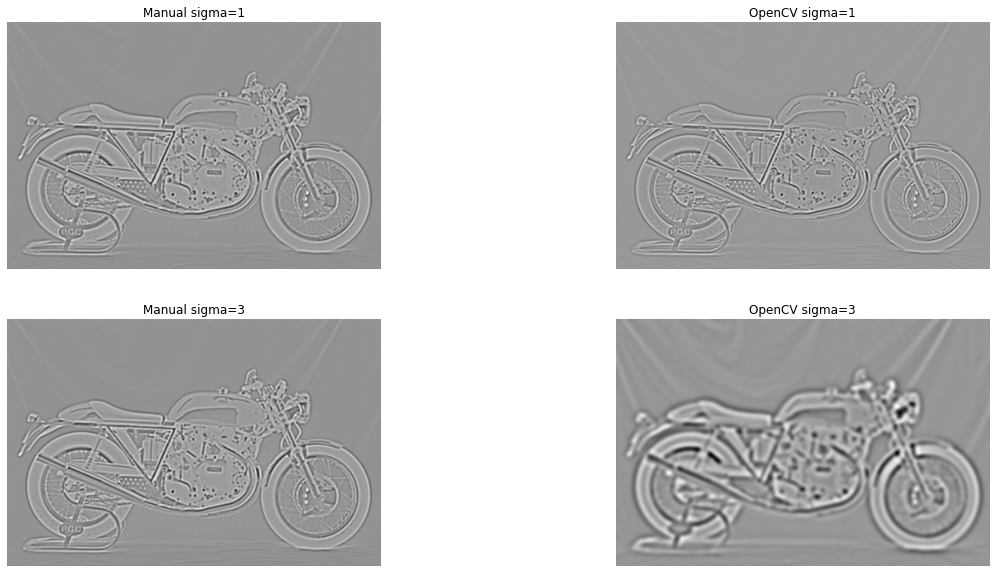

In [7]:
def laplaciana(img,sig):
  gaussiana_sigma1,derivada1_sigma1,derivada2_sigma1 = mascaras1D(sigma = sig)
  dxx = convolucion(img,derivada2,gaussiana)
  dyy = convolucion(img,gaussiana,derivada2)
  laplaciana_img = (sig**2)*(dxx+dyy)
  return laplaciana_img


def openCV_laplaciana(img,sig):
  # Apply Gaussian Blur
  blur = cv.GaussianBlur(img,(0,0),sig,cv.BORDER_REFLECT)
  # Apply Laplacian operator in some higher datatype
  laplaciana_img = cv.Laplacian(blur,cv.CV_64F)
  return laplaciana_img

img = cv.imread('images/motorcycle.bmp',0).astype(np.float64)

#sigma=1
laplaciana_sigma1 = laplaciana(img,1)
laplaciana_sigma1_opencv = openCV_laplaciana(img,1)
#sigma=3
laplaciana_sigma3 = laplaciana(img,3)
laplaciana_sigma3_opencv = openCV_laplaciana(img,3)

imagenes=[laplaciana_sigma1,laplaciana_sigma1_opencv,laplaciana_sigma3,laplaciana_sigma3_opencv]
titulos=['Manual sigma=1','OpenCV sigma=1','Manual sigma=3','OpenCV sigma=3']
visualizar(imagenes,titulos,(20,10),2,2)


En este ejercicio se debe obtener la laplaciana de una gaussiana de una imagen a partir de las funciones de los apartados anteriores.

Para codificar el cálculo de la laplaciana de una gaussiana de una imagen, basta con obtener la derivada segunda de la imagen en ambas direcciones (X e Y), utilizando para ello las máscaras de la gaussiana y de la segunda derivada de la gaussiana para un sigma concreto (de manera análoga a como se calculó la primera derivada en el apartado 1C), y realizar el cálculo
$$Laplaciana=\sigma^2(segundaDerivadaEnX + segundaDerivadaEnY)$$

Ahora bien, ¿por qué se puede calcular la Laplaciana de la Gaussiana de una imagen esta manera?

El operador Laplaciano de una función $I$ se define como la divergencia de su vector gradiente:
$$\nabla^2I(x,y)=\frac{\partial^2I }{\partial x^2}+\frac{\partial^2I }{\partial y^2}$$

Por tanto, teniendo en cuenta la separabilidad de la Gaussiana y las propiedades asociativas y distributivas de la convolución, la Laplaciana de la Gaussiana de una imagen puede ser obtenida como
$$\nabla^2(I*G)=\frac{\partial^2(I*G) }{\partial x^2}+\frac{\partial^2(I*G) }{\partial y^2}=I*(\frac{\partial^2G }{\partial x^2}+\frac{\partial^2G }{\partial y^2})=I*(\frac{\partial^2G }{\partial x^2})+I*(\frac{\partial^2G }{\partial y^2})$$

Teniendo en cuenta el desarrollo anterior, y lo comentado en los apartados anteriores, llegamos a que podemos obtener la Laplaciana buscado convolucionando la imagen con la máscara de segunda derivada de la gaussiana por filas y con una de alisamiento (la gaussiana) por columnas -para calcular  $I*(\frac{\partial^2G }{\partial x^2})$-. Para calcular el otro miembro de la expresión simplemente se deben intercambiar las máscaras de convolución. Todas las máscaras necesarias se pueden obtener del apartado 1A, cumpliendo lo pedido en el enunciado del apartado.

Una vez obtenido lo anterior, se pide comparar los resultados por la Laplaciana que calcula openCV. Este se puede realizar mediante la función *Laplacian()*, la cual recibe como entrada una imagen alisada mediante una mascara gaussiana (empleando en este caso la función *gaussianBlur()*).

En las imágenes que acompañan al texto se muestran ejemplos para los valores $\sigma=1$ y $\sigma=3$. Si bien para el primer $\sigma$ los resultados son similares, para el otro la imagen de OpenCV se ve mucho más borrosa. Esto es debido a que en este caso no se puede realizar la comparativa tan exacta como en el apartado anterior, debido a que la función *Laplacian()* no acepta como parámetro $\sigma$, solamente el tamaño del kernel. Por tanto, este parámetro es calculado por la propia función, y este cálculo difiere del que se realiza por nuestra convolución manual, como se explicó en el apartado 1C.

Por esta razón considero que en este caso el cálculo "manual" es superior al proporcionado por las funciones de la librería, ya que obtiene imágenes cuyo alisamiento no es excesivo, permitiendo obtener más información de la imagen.



#Ejercicio 2A
**Una función que genere una representación en pirámide Gaussiana de 4 niveles de una imagen. Mostrar ejemplos de funcionamiento usando bordes replicados o reflejados, y justificar la elección de los parámetros. Mostrar todos los niveles de la pirámide en una única imagen. Comparar los resultados con la pirámide obtenida usando las funciones OpenCV.**

Piramide manual con sigma creciente por niveles


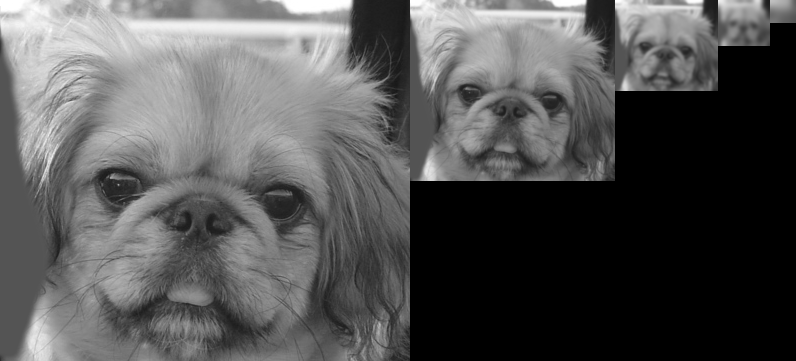


Piramide Gaussiana calculada por openCV.pyrDown()


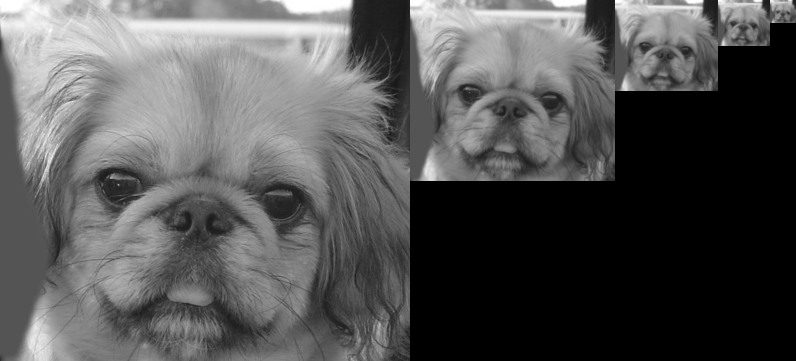


Piramide manual con sigma constante =1


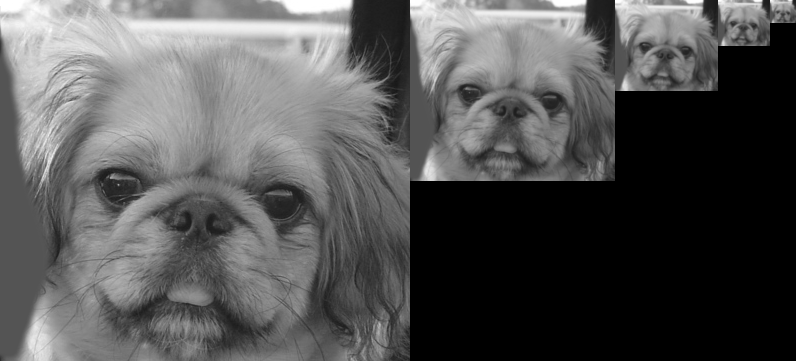

In [8]:
def gaussian_pyramid(img,escalar_sigma=False):
  pyramid = [img]
  
  if escalar_sigma == False:
    gaussiana,derivada1,derivada2 = mascaras1D(sigma=1)
  
  for i in range(4): #Piramide de 4 niveles
    if escalar_sigma:
      gaussiana,derivada1,derivada2 = mascaras1D(sigma=2**i)
    img_convolucionada = convolucion(img,gaussiana,gaussiana)
    img_reescalada = img_convolucionada[::2,::2]
    pyramid.append(img_reescalada)
    img = img_reescalada
  return pyramid

def openCV_gaussian_pyramid(img):
  pyramid=[img]
  img_level = img

  for _ in range(4):
    img_level = cv.pyrDown(img_level)
    pyramid.append(img_level)
  return pyramid
    

img = cv.imread('images/dog.bmp',0).astype(np.float64)

print("Piramide manual con sigma creciente por niveles")
pyramid1 = gaussian_pyramid(img,True)
pintaMI(pyramid1)

print("\nPiramide Gaussiana calculada por openCV.pyrDown()")
pyramid2 = openCV_gaussian_pyramid(img)
pintaMI(pyramid2)

print("\nPiramide manual con sigma constante =1")
pyramid3 = gaussian_pyramid(img)
pintaMI(pyramid3)




La pirámide gaussiana de una imagen se construye aplicando un alisado con un kernel gaussiano a la imagen de forma repetida, submuestreando la imagen a la mitad entre cada alisamiento.

Por un lado,la función *gaussian_pyramid()* utiliza la función de *convolucion()* explicada en el apartado 1C para realizar el alisamiento (convolucionando en las 2 direcciones de la imagen con una máscara gaussiana con un sigma determinado), y submuestrea la imagen eliminando las filas y las columnas pares.

Por otro lado, *openCV_gaussian_pyramid()* emplea la función de openCV *pyrDown()*, la cual genera de manera automática un nivel de la pirámide (convolución+submuestreo). Por tanto, para construir una pirámide de 4 niveles como en este caso, basta con invocar 4 veces dicha función, pasándole como argumento la imagen obtenida en la ejecución anterior (que se corresponde con el nivel anterior de la pirámide).

La teoría dice que, para calcular correctamente una pirámide gaussiana, el valor de sigma debe aumentar en el mismo factor en que se submuestrea la imagen. Es decir, en cada nivel debería doblarse dicho valor. La primera imagen mostrada se corresponde con esta situación.

Sin embargo, si lo comparamos con la pirámide calculada empleando *pyrDown()*, se puede ver como en los niveles superiores de la pirámide, el alisamiento es mucho menor en este caso. ¿A qué se debe esta diferencia? Tras realizar varias pruebas, se vio que lo que calcular realmente *pyrDown()* es una pirámide donde siempre se utiliza $\sigma=1$: no escala a medida que se sube de nivel en la pirámide. La última imagen muestra la pirámide calculada con *gaussian_pyramid()* utilizando siempre $\sigma=1$, pudiéndose ver como en este caso sí se ven iguales ambas pirámides.

#Ejercicio 2B

**Una función que genere una representación en pirámide Laplaciana de 4 niveles de una imagen. Mostrar ejemplos de funcionamiento usando bordes. Mostrar todos los niveles de la pirámide en una única imagen. Comparar los resultados con la pirámide obtenida usando las funciones OpenCV.**


Piramide manual


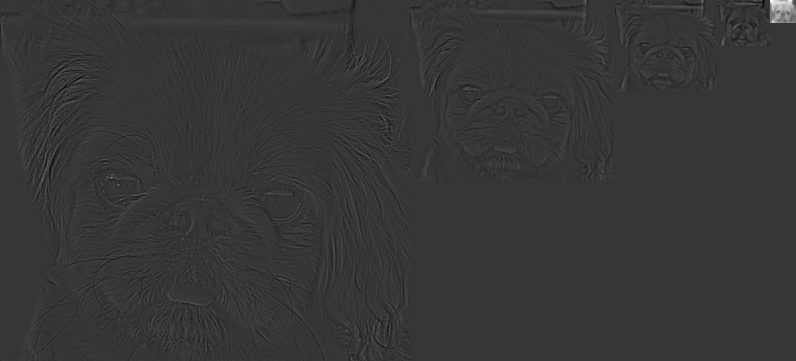


Piramide calculada por OpenCV


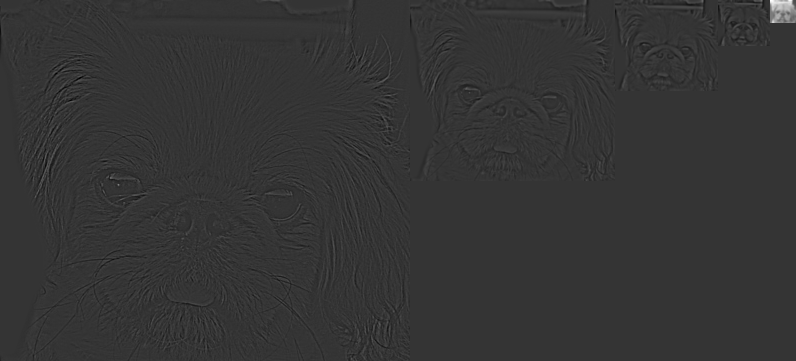

In [9]:

def laplacian_pyramid(img):
  
  gaussian_pyr = gaussian_pyramid(img)

  laplacian_pyr = []

  for i in range(4):
    dimension = (gaussian_pyr[i].shape[1],gaussian_pyr[i].shape[0])
    gaussian_expanded = cv.resize(gaussian_pyr[i+1],dimension,interpolation = cv.INTER_LINEAR)
    laplacian_img = gaussian_pyr[i]-gaussian_expanded
    laplacian_pyr.append(laplacian_img)

  laplacian_top = gaussian_pyr[-1] 
  laplacian_pyr.append(laplacian_top)
  
  return laplacian_pyr

def openCV_laplacian_pyramid(img):
  
  gaussian_pyr = openCV_gaussian_pyramid(img)
  laplacian_pyr = []
  
  for i in range(4):
    dimension = (gaussian_pyr[i].shape[1],gaussian_pyr[i].shape[0])
    gaussian_expanded = cv.pyrUp(gaussian_pyr[i+1],dstsize=dimension)
    laplacian_img = cv.subtract(gaussian_pyr[i],gaussian_expanded) 
    laplacian_pyr.append(laplacian_img)

  laplacian_top = gaussian_pyr[-1] 
  laplacian_pyr.append(laplacian_top)

  return laplacian_pyr


img = cv.imread('images/dog.bmp',0).astype(np.float64)

print("\nPiramide manual")
laplacian_pyr = laplacian_pyramid(img)
pintaMI(laplacian_pyr,reescalado=True)

print("\nPiramide calculada por OpenCV")
laplacian_pyr_openCV = openCV_laplacian_pyramid(img)
pintaMI(laplacian_pyr_openCV,reescalado=True)




La pirámide Laplaciana de una imagen se construye a partir de la pirámide Gaussiana, siendo cada nivel de la Laplaciana la diferencia entre el nivel $i+1$ de la pirámide Gaussiana, sobremuestreada al tamaño del nivel $i$, y el propio nivel $i$ de dicha pirámide. El último nivel de la pirámide no sigue este patrón, siendo simplemente el último nivel de la pirámide Gaussiana.

La función de OpenCV asociada a la contrucción de esta pirámide es *pyrUp()*, la cual funciona de manera similar a *pyrDown()*, pasándole como entrada el nivel previamente calculado.

En este caso, las diferencias entre la pirámide calculada manualmente y por OpenCV es mínima, teniendo en cuenta que la pirámide Gaussiana está calculada utilizando en todos los niveles $\sigma=1$, como se vió en el ejercicio anterior.

#Ejercicio 2C

**Verificar el correcto funcionamiento de la pirámide Laplaciana por medio de mostrar su capacidad para recuperar la imagen original. Se debe mostrar el error obtenido en la aproximación, en términos de distancia Euclídea entre los niveles de gris de la imagen original y la imagen reconstruida.**


 Diferencia entre las imagenes (distancia euclidiana):  6.091635000687123e-14


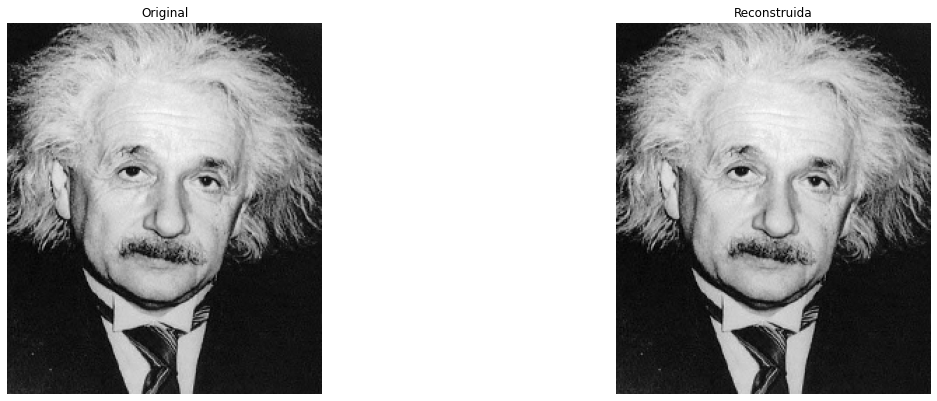

In [10]:
def reconstruir_imagen(laplacian_pyr):

  pyr_size = len(laplacian_pyr)
  ini = laplacian_pyr[-1]

  for i in range(pyr_size-1,0,-1):
    dimension = (laplacian_pyr[i-1].shape[1],laplacian_pyr[i-1].shape[0])
    aux = cv.resize(ini,dimension, interpolation = cv.INTER_LINEAR)
    ini = aux+laplacian_pyr[i-1]

  return ini


img = cv.imread('images/einstein.bmp',0).astype(np.float64)

laplacian_pyr = laplacian_pyramid(img) #Obtenemos la piramide laplaciana a partir de la cual se va a reconstruir la imagen
rimg = reconstruir_imagen(laplacian_pyr)

imgs = [img,rimg]
titles = ['Original','Reconstruida']
visualizar(imgs,titles,(20,15),1,2)
distancia = np.linalg.norm(img-rimg)
print("\n Diferencia entre las imagenes (distancia euclidiana): ",distancia)


La pirámide Laplaciana permite la reconstrucción de la imagen de la que procede. Esto es gracias a que el último nivel almacena el último nivel de la pirámide Gaussiana (imagen original reducida), lo cual permite, aumentando el nivel $i+1$ al tamaño del nivel $i$ y sumándolos, reconstruir la imagen original (ya que el resto de niveles de la pirámide laplaciana almacenan los detalles de la imagen original a diferentes escalas)

Como se puede ver en la diferencia entre las imágenes, la reconstrucción es perfecta (salvo errores de redondeo). 


#Bonus 1
**Implementar una función que genere las imágenes de baja y alta frecuencia a partir de las parejas de imágenes (solo en la versión de imágenes de gris) .**

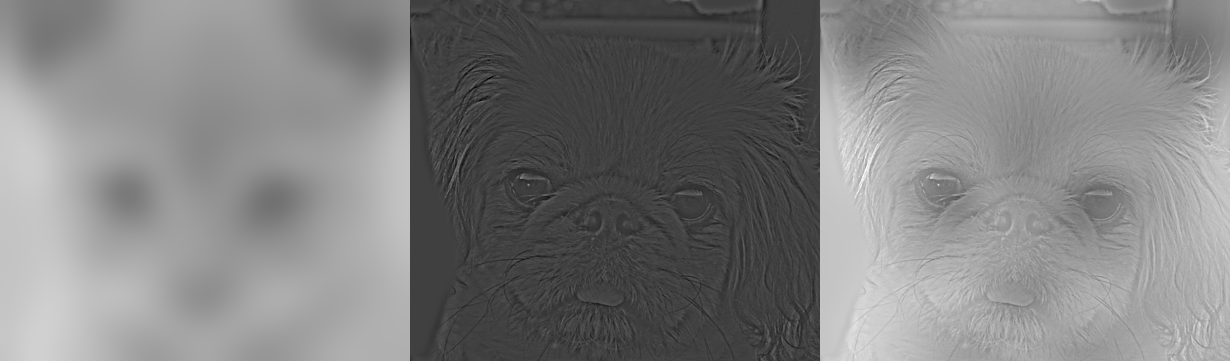

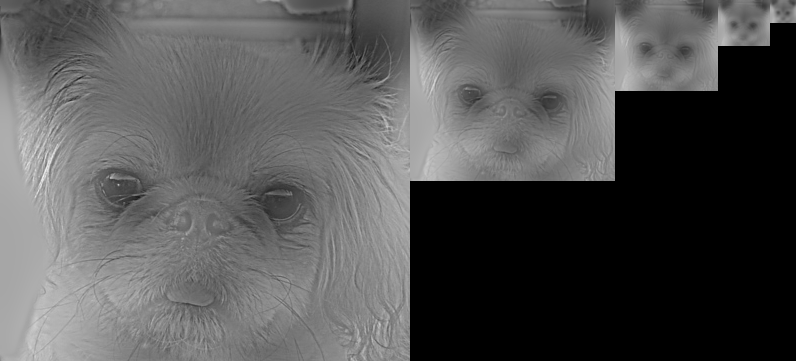

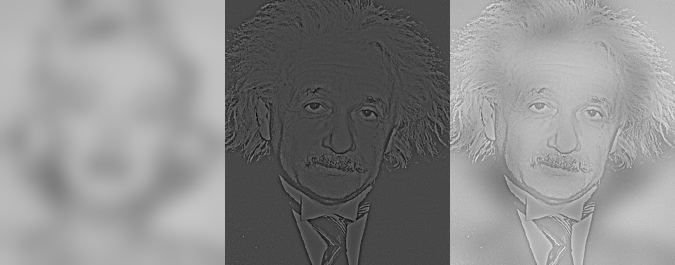

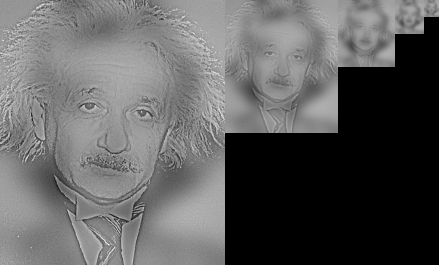

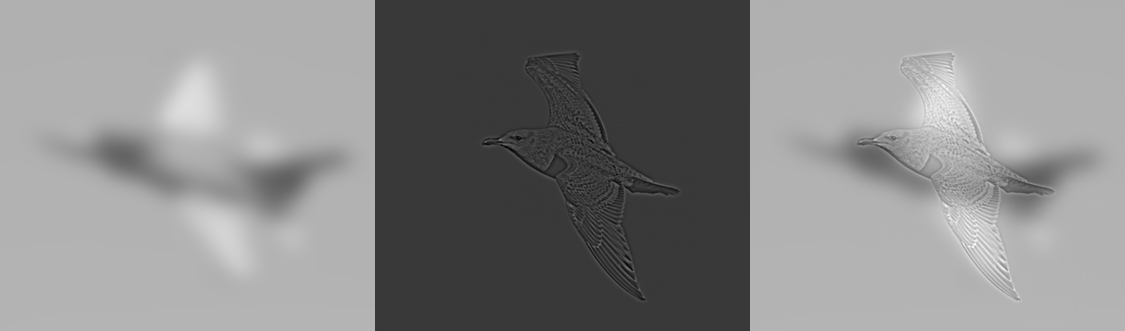

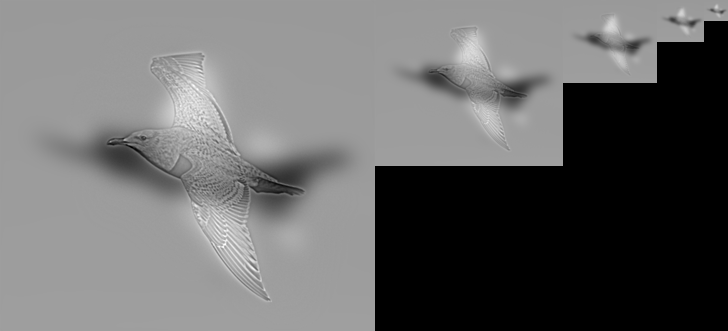

In [11]:

def hybrid_images(img_low,img_high,sigma_low,sigma_high):
  gaussiana_low = mascaras1D(sigma = sigma_low)[0]
  gaussiana_high = mascaras1D(sigma = sigma_high)[0]
  low = convolucion(img_low,gaussiana_low,gaussiana_low)
  high = convolucion(img_high,gaussiana_high,gaussiana_high)
  high = np.subtract(img_high,high)
  out = np.add(low,high)
  return out,low,high

#Ejemplos--------------------------

#Cat vs Dog
img_low = cv.imread('images/cat.bmp',0).astype(np.float64)
img_high = cv.imread('images/dog.bmp',0).astype(np.float64)

hybrid,low_frec,high_frec = hybrid_images(img_low,img_high,18,3)
pyramid = gaussian_pyramid(hybrid)

pintaMI([low_frec,high_frec,hybrid],reescalado = True)
print("\n")
pintaMI(pyramid)
print("\n")

#Marilyn vs Einstein
img_low = cv.imread('images/marilyn.bmp',0).astype(np.float64)
img_high = cv.imread('images/einstein.bmp',0).astype(np.float64)

hybrid,low_frec,high_frec = hybrid_images(img_low,img_high,10,2)
pyramid = gaussian_pyramid(hybrid)

pintaMI([low_frec,high_frec,hybrid],reescalado=True)
print("\n")
pintaMI(pyramid,reescalado=True)
print("\n")

#Plane vs Bird
img_low = cv.imread('images/plane.bmp',0).astype(np.float64)
img_high = cv.imread('images/bird.bmp',0).astype(np.float64)

hybrid,low_frec,high_frec = hybrid_images(img_low,img_high,10,2)
pyramid = gaussian_pyramid(hybrid)

pintaMI([low_frec,high_frec,hybrid],reescalado=True)
print("\n")
pintaMI(pyramid)
print("\n")

Una imagen híbrida está compuesta por dos imágenes, las cuales son procesadas para obtener de una sus frecuencias altas y de la otra las bajas. Esto provoca que si miramos de cerca la imagen, veamos claramente una de las imágenes que la componen (la de altas frecuencias), y si nos alejamos, se vea la otra (la de bajas frecuencias).

La función *hybrid_images(img_low,img_high,sigma_low,sigma_high)* devuelve una imagen híbrida formada por *img_low* y *img_high*. Para ello, en primer lugar obtiene las máscaras gaussianas empleadas para alisar cada una de las imágenes, utilizando para ello los valores de $\sigma$ *sigma_low* y *sigma_high*. La imagen de baja frecuencia es obtenida convolucionando la imagen con las máscara gaussiana correspondiente, mientras que la de altas frecuencias se obtiene restándole a la imagen la convolución por su correspondiente máscara gaussiana (es decir, primero se alisa la imagen para obtener las frecuencias bajas y luego se restan a la original para "quitárselas").

La elección de que imagen va a ser la de altas frecuencias y cual la de bajas es muy importante para que el efecto se logre adecuadamente. Lo más conveniente es escoger como la de altas frecuencias aquella que tenga una mayor cantidad de detalles.

La elección del $\sigma$ es más "artística", siendo lo mejor probar diferentes combinaciones para cada par de imágenes hasta obtener el resultado buscado.

Para mostrar todo lo anterior, se eligieron 3 pares de imágenes y se obtuvo una imagen híbrida para cada par, mostrándose la imagen de bajas frecuencias, la de altas y la híbrida juntas para poder observar cómo funciona.

Además, cada imagen híbrida se acompaña de su pirámide gaussiana. Esta permite observar el efecto de ver una imagen de cerca y otra de lejos sin tener que separarse de la pantalla: Los primeros niveles muestran la imagen de altas frecuencias, mientras que los últimos, la de bajas frecuencias.

#Bonus 2
**Realizar todas las parejas de imágenes híbridas en su formato a color**

In [14]:
def hybrid_images_color(img_low,img_high,sigma_low,sigma_high):
  
  gaussiana_low = mascaras1D(sigma = sigma_low)[0]
  gaussiana_high = mascaras1D(sigma = sigma_high)[0]

  low = []
  high = []
  hybrid = []
  pyramid_list = []
  
  # Separamos los canales:
  low_channels = cv.split(img_low)
  high_channels = cv.split(img_high)

  # Para cada canal repetimos el siguiente proceso:
  for lc, hc in zip(low_channels, high_channels):
    low_c = convolucion(lc,gaussiana_low,gaussiana_low)
    high_c = convolucion(hc,gaussiana_high,gaussiana_high)
    high_c = np.subtract(hc,high_c)
    hybrid_c = np.add(low_c,high_c)

    pyramid_c = gaussian_pyramid(hybrid_c)

    low.append(low_c)
    high.append(high_c)
    hybrid.append(hybrid_c)
    pyramid_list.append(pyramid_c)

  low = cv.merge(low)
  high = cv.merge(high)
  hybrid = cv.merge(hybrid)
  
  #Reconstruccion de las imagenes de la piramide gaussiana
  pyramid = []
  elements = []
  for i in range(5): #4 Niveles de la piramide + imagen original
    for j in range(3): #Las imagenes a color tienen 3 niveles
      elements.append(pyramid_list[j][i])
    element = cv.merge(elements)
    pyramid.append(element)
    elements.clear()

  return hybrid,low,high,pyramid


#Ejemplos--------------------------

#Cat vs Dog
img_low = cv.imread('images/cat.bmp').astype(np.float64)
img_high = cv.imread('images/dog.bmp').astype(np.float64)

hybrid,low_frec,high_frec,pyramid = hybrid_images_color(img_low,img_high,20,3)

pintaMI([low_frec,high_frec,hybrid],grises=False)
print("\n")
pintaMI(pyramid,grises=False)
print("\n")

#Submarine vs Fish
img_low = cv.imread('images/submarine.bmp').astype(np.float64)
img_high = cv.imread('images/fish.bmp').astype(np.float64)

hybrid,low_frec,high_frec, pyramid = hybrid_images_color(img_low,img_high,10,2)

pintaMI([low_frec,high_frec,hybrid],grises=False)
print("\n")
pintaMI(pyramid,grises=False)
print("\n")

#Plane vs Bird
img_low = cv.imread('images/plane.bmp').astype(np.float64)
img_high = cv.imread('images/bird.bmp').astype(np.float64)

hybrid,low_frec,high_frec, pyramid = hybrid_images_color(img_low,img_high,12,3)

pintaMI([low_frec,high_frec,hybrid],grises=False)
print("\n")
pintaMI(pyramid,grises=False)
print("\n")
  

Output hidden; open in https://colab.research.google.com to view.

Este ejercicio consiste en obtener imágenes híbridas a color, ya que en el apartado anterior solo se piden para imágenes en escala de grises.

Teniendo el apartado anterior es muy sencillo. Lo único que debemos hacer es separar las imágenes en sus 3 canales (utilizándose para ello la función de openCV *split()*, y para cada par de alta/baja frecuencias del mismo canal, crear la imagen híbrida correspondiente utilizando la función creada en el apartado anterior. Finalmente, se vuelven a juntar los canales (mediante la función *merge()*) para reconstruir la imagen híbrida a color. 

En este caso la función *hybrid_images_color()* devuelve además la pirámide asociada a la imagen híbrida, ya que para construir la pirámide a color también debemos trabajar con los distintos canales por separado y luego juntarlos (ya que las funciones del ejercicio 1 están pensadas para imágenes en escala de grises).

Respecto a los ejemplos, el de Einstein y Marylin se cambió por el submarino y los peces (ya que en el primero las imágenes originales ya se encontraban en escala de grises). Mencionar también que se reajustaron los sigmas en algún caso para que el efecto quedase igual de bien conseguido que en el apartado anterior.

#Bonus 3
**Realizar una imagen híbrida con, al menos, una pareja de imágenes de su elección que hayan sido extraídas de imágenes más grandes. Justifique la elección y todos los pasos que realiza.**

In [15]:
morgan_freeman = cv.imread('images/morgan_freeman_original.jpg').astype(np.float64)
quokka = cv.imread('images/quokka_original.jpg').astype(np.float64)
print("Imágenes originales\n")
cv2_imshow(morgan_freeman)
cv2_imshow(quokka)
img_high = cv.imread('images/morgan_freeman.jpg').astype(np.float64)
img_low = cv.imread('images/quokka.jpg').astype(np.float64)

hybrid,low_frec,high_frec,pyramid = hybrid_images_color(img_low,img_high,11,2)
print("\nImágenes recortadas\n")
pintaMI([img_low,img_high],grises=False)
print("\n")
pintaMI([low_frec,high_frec,hybrid],grises=False)
print("\n")
pintaMI(pyramid,grises=False)
print("\n")


Output hidden; open in https://colab.research.google.com to view.

En este ejercicio debemos escoger 2 imágenes cualquiera y crear una imagen híbrida con ella. En mi caso, escogí una fotografía de la cara del actor Morgan Freeman y una imagen de un Quokka, un pequeño marsupial australiano considerado "el animal más feliz del mundo".

La elección de estas imágenes obedeció a varias razones:


*   El tamaño y la ubicación del área de interés (las caras en este caso) era similar en ambas imágenes

*   Los colores predominantes en ambas imágenes eran similares (tonos marrones)

Antes de trabajar con las imágenes, fue necesario recortarlas para que tuviesen el mismo tamaño y ajustar lo máximo posible ambas caras. En el caso de Freeman, simplemente se recortaron los laterales de la imagen. En el caso del Quokka, fue necesario afinar más, teniendo que recortar los laterales de la cara para que la ubicación de las orejas, ojos y boca se acercasen lo máximo posible a la cara humana.

En cuanto a la elección de la imagen de alta frecuencia, en este caso escogí la de Morgan Freeman. Esto podría parecer contradictorio, ya que la del Quokka tiene un mayor número de detalles (provocado por el pelaje, que destaca sobre el resto). Sin embargo, al intentar realizar el montaje de esa manera, el resultado no era para nada satisfactorio. Los rasgos del animal se destacaban exageradamente, y no casaba con los de la cara de Freeman. Probando al revés el resultado es mucho mejor, quedando la imagen de Freeman como con una sombra marrón por encima (pero viéndose la cara perfectamente), y viéndose el animal sin problema en los niveles superiores de la pirámide.

